<a href="https://colab.research.google.com/github/aleksandrablaszczyk/bikes/blob/Data-Science-bootcamp/02_pandas/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.23.5
Pandas: 1.5.3


##Załadowanie danych

In [3]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web #biblioteka pomocnicza, która pozwala na webscrapping
    return web.DataReader(name=company, data_source='stooq')
#jeżeli uruchamiamy to na lokalnym środowisku, to po >30 razach w jednym dniu, to włącza się blokada.
df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2023-09-22 to 2018-09-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [4]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-22,131.110,132.0300,128.5200,129.1200,59904348
2023-09-21,131.940,132.2400,129.3100,129.3300,70343342
2023-09-20,138.550,139.3700,135.2000,135.2900,46263716
2023-09-19,138.700,138.8400,135.5600,137.6300,61482470
2023-09-18,140.480,141.7500,139.2200,139.9800,42823480
...,...,...,...,...,...
2018-10-01,101.100,101.6600,100.1800,100.2180,69365700
2018-09-28,100.220,101.3260,99.8230,100.1500,81702700
2018-09-27,99.662,100.8080,99.4290,100.6490,86587820


In [5]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-22,131.11,132.03,128.52,129.12,59904348
2023-09-21,131.94,132.24,129.31,129.33,70343342
2023-09-20,138.55,139.37,135.20,135.29,46263716
2023-09-19,138.70,138.84,135.56,137.63,61482470
2023-09-18,140.48,141.75,139.22,139.98,42823480


In [6]:
#można dodać parametr
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-22,131.11,132.03,128.520,129.12,59904348
2023-09-21,131.94,132.24,129.310,129.33,70343342
2023-09-20,138.55,139.37,135.200,135.29,46263716
2023-09-19,138.70,138.84,135.560,137.63,61482470
2023-09-18,140.48,141.75,139.220,139.98,42823480
2023-09-15,142.69,143.57,140.090,140.39,102909327
2023-09-14,145.08,145.86,142.950,144.72,64033607
2023-09-13,140.95,144.98,140.865,144.85,60465175
2023-09-12,142.32,143.00,140.610,141.23,42668452


In [7]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2018-10-01,101.100,101.6600,100.1800,100.2180,69365700
2018-09-28,100.220,101.3260,99.8230,100.1500,81702700
2018-09-27,99.662,100.8080,99.4290,100.6490,86587820
2018-09-26,98.425,99.7625,98.0760,98.7425,86269180
2018-09-25,97.145,98.7955,96.9425,98.7275,90768140


In [8]:
#tak samo można dodać parametry
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2018-10-08,93.7000,95.1000,91.5330,93.2210,147863980
2018-10-05,95.8995,96.4540,93.1415,94.4825,136446540
2018-10-04,97.4500,97.8000,94.8285,95.4710,145139460
2018-10-03,99.0850,99.4850,97.4905,97.6380,105062620
2018-10-02,99.9995,100.6700,98.2885,98.5655,108014980
2018-10-01,101.1000,101.6600,100.1800,100.2180,69365700
2018-09-28,100.2200,101.3260,99.8230,100.1500,81702700
2018-09-27,99.6620,100.8080,99.4290,100.6490,86587820
2018-09-26,98.4250,99.7625,98.0760,98.7425,86269180


In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [10]:
#zamieniamy duże litery na małe
df.columns = [col.lower() for col in df.columns]
#iterujemy po columns
df.head()

,open,high,low,close,volume
Date,,,,,
2023-09-22,131.11,132.03,128.52,129.12,59904348
2023-09-21,131.94,132.24,129.31,129.33,70343342
2023-09-20,138.55,139.37,135.20,135.29,46263716
2023-09-19,138.70,138.84,135.56,137.63,61482470
2023-09-18,140.48,141.75,139.22,139.98,42823480


In [11]:
df.describe()

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,124.765153,126.316114,123.082144,124.703014,8.100014e+07
std,32.601356,32.885550,32.245028,32.526408,3.824272e+07
min,67.300000,69.801500,65.350000,67.198000,1.762674e+07
25%,93.544000,94.685000,92.472000,93.490000,5.562370e+07
50%,120.592000,122.040000,118.606000,120.520000,6.952960e+07
75%,158.338000,159.938000,156.250000,158.100000,9.545732e+07
max,187.200000,188.654000,184.840000,186.570000,3.113457e+08


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1257.0,1.247652e+02,3.260136e+01,6.730000e+01,9.354400e+01,1.205920e+02,1.583380e+02,1.872000e+02
high,1257.0,1.263161e+02,3.288555e+01,6.980150e+01,9.468500e+01,1.220400e+02,1.599380e+02,1.886540e+02
low,1257.0,1.230821e+02,3.224503e+01,6.535000e+01,9.247200e+01,1.186060e+02,1.562500e+02,1.848400e+02
close,1257.0,1.247030e+02,3.252641e+01,6.719800e+01,9.349000e+01,1.205200e+02,1.581000e+02,1.865700e+02
volume,1257.0,8.100014e+07,3.824272e+07,1.762674e+07,5.562370e+07,6.952960e+07,9.545732e+07,3.113457e+08


##Selekcja kolumn

In [13]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2023-09-22,131.11,132.03,128.520,129.12,59904348
2023-09-21,131.94,132.24,129.310,129.33,70343342
2023-09-20,138.55,139.37,135.200,135.29,46263716
2023-09-19,138.70,138.84,135.560,137.63,61482470
2023-09-18,140.48,141.75,139.220,139.98,42823480
2023-09-15,142.69,143.57,140.090,140.39,102909327
2023-09-14,145.08,145.86,142.950,144.72,64033607
2023-09-13,140.95,144.98,140.865,144.85,60465175
2023-09-12,142.32,143.00,140.610,141.23,42668452


In [14]:
df['open']

Date
2023-09-22    131.11
2023-09-21    131.94
2023-09-20    138.55
2023-09-19    138.70
2023-09-18    140.48
2023-09-15    142.69
2023-09-14    145.08
2023-09-13    140.95
2023-09-12    142.32
2023-09-11    138.75
Name: open, dtype: float64

In [15]:
df.open

Date
2023-09-22    131.11
2023-09-21    131.94
2023-09-20    138.55
2023-09-19    138.70
2023-09-18    140.48
2023-09-15    142.69
2023-09-14    145.08
2023-09-13    140.95
2023-09-12    142.32
2023-09-11    138.75
Name: open, dtype: float64

In [16]:
df[['open']]

,open
Date,
2023-09-22,131.11
2023-09-21,131.94
2023-09-20,138.55
2023-09-19,138.70
2023-09-18,140.48
2023-09-15,142.69
2023-09-14,145.08
2023-09-13,140.95
2023-09-12,142.32


In [17]:
df[['open', 'close']]

,open,close
Date,,
2023-09-22,131.11,129.12
2023-09-21,131.94,129.33
2023-09-20,138.55,135.29
2023-09-19,138.70,137.63
2023-09-18,140.48,139.98
2023-09-15,142.69,140.39
2023-09-14,145.08,144.72
2023-09-13,140.95,144.85
2023-09-12,142.32,141.23


Wycinanie dzięki iloc

In [18]:
df.iloc[:,0]

Date
2023-09-22    131.11
2023-09-21    131.94
2023-09-20    138.55
2023-09-19    138.70
2023-09-18    140.48
2023-09-15    142.69
2023-09-14    145.08
2023-09-13    140.95
2023-09-12    142.32
2023-09-11    138.75
Name: open, dtype: float64

In [19]:
#jeśli chcemy znowu open i close, to musimy podać listę

df.iloc[:, [0,3]]

,open,close
Date,,
2023-09-22,131.11,129.12
2023-09-21,131.94,129.33
2023-09-20,138.55,135.29
2023-09-19,138.70,137.63
2023-09-18,140.48,139.98
2023-09-15,142.69,140.39
2023-09-14,145.08,144.72
2023-09-13,140.95,144.85
2023-09-12,142.32,141.23


In [21]:
#możemy też wycinać zakres komórek
df.iloc[:,3:5]

,close,volume
Date,,
2023-09-22,129.12,59904348
2023-09-21,129.33,70343342
2023-09-20,135.29,46263716
2023-09-19,137.63,61482470
2023-09-18,139.98,42823480
2023-09-15,140.39,102909327
2023-09-14,144.72,64033607
2023-09-13,144.85,60465175
2023-09-12,141.23,42668452


In [22]:
#wycinanie ostatniej kolumny
df.iloc[:,-1]

Date
2023-09-22     59904348
2023-09-21     70343342
2023-09-20     46263716
2023-09-19     61482470
2023-09-18     42823480
2023-09-15    102909327
2023-09-14     64033607
2023-09-13     60465175
2023-09-12     42668452
2023-09-11     56764525
Name: volume, dtype: int64

In [24]:
df.iloc[:,[-1]]

,volume
Date,
2023-09-22,59904348
2023-09-21,70343342
2023-09-20,46263716
2023-09-19,61482470
2023-09-18,42823480
2023-09-15,102909327
2023-09-14,64033607
2023-09-13,60465175
2023-09-12,42668452


In [25]:
df.iloc[:,-3:]

,low,close,volume
Date,,,
2023-09-22,128.520,129.12,59904348
2023-09-21,129.310,129.33,70343342
2023-09-20,135.200,135.29,46263716
2023-09-19,135.560,137.63,61482470
2023-09-18,139.220,139.98,42823480
2023-09-15,140.090,140.39,102909327
2023-09-14,142.950,144.72,64033607
2023-09-13,140.865,144.85,60465175
2023-09-12,140.610,141.23,42668452


##Wycinanie wierszy

In [26]:
df

,open,high,low,close,volume
Date,,,,,
2023-09-22,131.11,132.03,128.520,129.12,59904348
2023-09-21,131.94,132.24,129.310,129.33,70343342
2023-09-20,138.55,139.37,135.200,135.29,46263716
2023-09-19,138.70,138.84,135.560,137.63,61482470
2023-09-18,140.48,141.75,139.220,139.98,42823480
2023-09-15,142.69,143.57,140.090,140.39,102909327
2023-09-14,145.08,145.86,142.950,144.72,64033607
2023-09-13,140.95,144.98,140.865,144.85,60465175
2023-09-12,142.32,143.00,140.610,141.23,42668452


In [27]:
df.iloc[0]

open           131.11
high           132.03
low            128.52
close          129.12
volume    59904348.00
Name: 2023-09-22 00:00:00, dtype: float64

In [29]:
#kilka indeksów
df.iloc[:3]
#sposób wyświetlania jest nieco inny

,open,high,low,close,volume
Date,,,,,
2023-09-22,131.11,132.03,128.52,129.12,59904348
2023-09-21,131.94,132.24,129.31,129.33,70343342
2023-09-20,138.55,139.37,135.20,135.29,46263716


In [32]:
df.loc['2023-09-22']

open           131.11
high           132.03
low            128.52
close          129.12
volume    59904348.00
Name: 2023-09-22 00:00:00, dtype: float64

In [38]:
df.loc['2023-09-22' : '2023-09-12']
#nie wiem czemu nie działa, jest dokładnie tak jak u typa...

,open,high,low,close,volume
Date,,,,,


##Obliczanie nowych kolumn

In [40]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1101 entries, 2023-09-22 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1101 non-null   float64
 1   High    1101 non-null   float64
 2   Low     1101 non-null   float64
 3   Close   1101 non-null   float64
 4   Volume  1101 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 51.6 KB


In [41]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-22,45.160,45.345,44.03,44.41,16158675
2023-09-21,45.790,45.790,43.93,44.60,27875722
2023-09-20,46.865,47.540,46.40,46.55,22581975
2023-09-19,46.400,47.755,46.21,47.59,19188602
2023-09-18,47.300,47.348,46.48,46.51,15025531


In [42]:
df.describe()

,Open,High,Low,Close,Volume
count,1101.000000,1101.000000,1101.000000,1101.000000,1.101000e+03
mean,37.544534,38.299156,36.745084,37.526785,2.512975e+07
std,9.389706,9.462219,9.257751,9.342366,1.609330e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,30.530000,31.150000,29.830000,30.470000,1.579689e+07
50%,35.510000,36.420000,34.595000,35.490000,2.135029e+07
75%,44.310000,45.040000,43.570000,44.270000,2.968855e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [43]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-22,45.160,45.345,44.03,44.41,16158675
2023-09-21,45.790,45.790,43.93,44.60,27875722
2023-09-20,46.865,47.540,46.40,46.55,22581975


In [44]:
#Chcemy obliczyć nową kolumnę, w której będzie średnia z open i close
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2023-09-22,45.160,45.345,44.03,44.41,16158675,44.7850
2023-09-21,45.790,45.790,43.93,44.60,27875722,45.1950
2023-09-20,46.865,47.540,46.40,46.55,22581975,46.7075
2023-09-19,46.400,47.755,46.21,47.59,19188602,46.9950
2023-09-18,47.300,47.348,46.48,46.51,15025531,46.9050


In [45]:
#liczymy dzienną zmianę procentową, ale chcemy mieć najpierw stare dane
#trzeba przypisać tę wartość
df = df.sort_index()
df

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.000,45.000,41.06,41.57,186322536,41.7850
2019-05-13,38.790,39.240,36.08,37.10,79442420,37.9450
2019-05-14,38.310,39.960,36.85,39.96,46661147,39.1350
2019-05-15,39.370,41.880,38.95,41.29,36086065,40.3300
2019-05-16,41.480,44.060,41.25,43.00,38115524,42.2400
...,...,...,...,...,...,...
2023-09-18,47.300,47.348,46.48,46.51,15025531,46.9050
2023-09-19,46.400,47.755,46.21,47.59,19188602,46.9950
2023-09-20,46.865,47.540,46.40,46.55,22581975,46.7075


In [49]:
#dla pierwszego wiersza nie możemy tego zrobić, liczymy od drugiego wiersza
df['Close_shift']= df[['Close']].shift(1)
#to przesuwa o jeden wiersz - teraz na pierwszym miejscu mamy brak danych, jak wstawimy inną liczbę to o inną liczbę wierszy.
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [56]:
#czyli teraz zmianę % liczymy na podstawie różnicy Close i Close_shift - zostaje to w jednym wierszu.
df['daily_change'] = df.Close / df.Close_shift -1
#dzięki odjęciu 1 dostajemy wartość procentową (tzn. ułamek)
df

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change,daily change
Date,,,,,,,,,
2019-05-10,42.000,45.000,41.06,41.57,186322536,41.7850,NaN,NaN,NaN
2019-05-13,38.790,39.240,36.08,37.10,79442420,37.9450,41.57,-0.107529,-0.107529
2019-05-14,38.310,39.960,36.85,39.96,46661147,39.1350,37.10,0.077089,0.077089
2019-05-15,39.370,41.880,38.95,41.29,36086065,40.3300,39.96,0.033283,0.033283
2019-05-16,41.480,44.060,41.25,43.00,38115524,42.2400,41.29,0.041414,0.041414
...,...,...,...,...,...,...,...,...,...
2023-09-18,47.300,47.348,46.48,46.51,15025531,46.9050,47.52,-0.021254,-0.021254
2023-09-19,46.400,47.755,46.21,47.59,19188602,46.9950,46.51,0.023221,0.023221
2023-09-20,46.865,47.540,46.40,46.55,22581975,46.7075,47.59,-0.021853,-0.021853


In [57]:
#Usuwanie niepotrzebnej kolumny
del df['daily change']

In [58]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [59]:
df.daily_change.min()

-0.21628767847699626

In [60]:
df.daily_change.max()

0.3825910931174088

<Axes: >

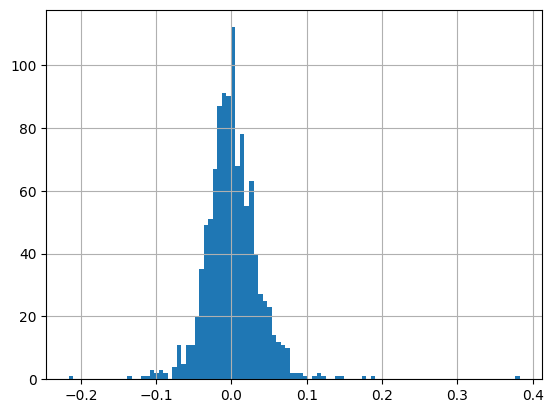

In [61]:
df.daily_change.hist(bins=100)

<Axes: >

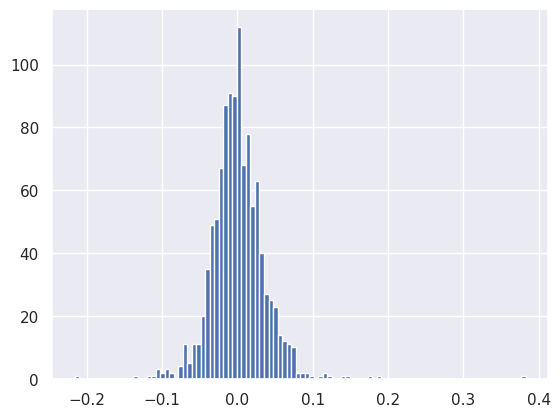

In [62]:
#dla przyjemniejszego stylu seaborn
import seaborn as sns
sns.set()

df.daily_change.hist(bins=100)

<Axes: xlabel='Date'>

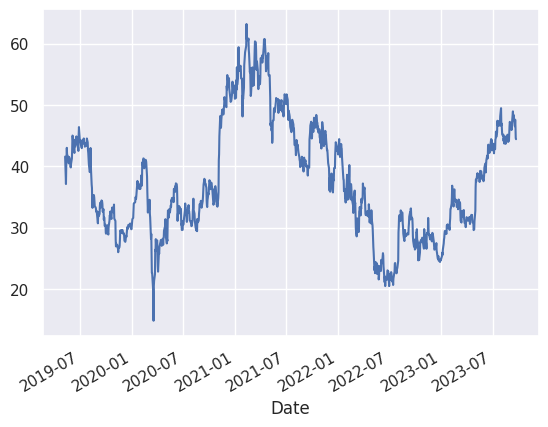

In [63]:
df.Close.plot()

In [64]:
#można poszukać sobie innych matematycznych, np. running avg

##Filtrowanie danych

In [65]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change
Date,,,,,,,,
2019-05-10,42.000,45.000,41.06,41.57,186322536,41.7850,NaN,NaN
2019-05-13,38.790,39.240,36.08,37.10,79442420,37.9450,41.57,-0.107529
2019-05-14,38.310,39.960,36.85,39.96,46661147,39.1350,37.10,0.077089
2019-05-15,39.370,41.880,38.95,41.29,36086065,40.3300,39.96,0.033283
2019-05-16,41.480,44.060,41.25,43.00,38115524,42.2400,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-09-18,47.300,47.348,46.48,46.51,15025531,46.9050,47.52,-0.021254
2023-09-19,46.400,47.755,46.21,47.59,19188602,46.9950,46.51,0.023221
2023-09-20,46.865,47.540,46.40,46.55,22581975,46.7075,47.59,-0.021853


In [66]:
df.daily_change > 0
#jako rezultat maska logiczna

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15     True
2019-05-16     True
              ...  
2023-09-18    False
2023-09-19     True
2023-09-20    False
2023-09-21    False
2023-09-22    False
Name: daily_change, Length: 1101, dtype: bool

In [69]:
#jak maska może posłużyć do wycinania danych

df_positive = df[df.daily_change > 0]
df_positive
#dostajemy te wersze, dla których to jest prawda

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change
Date,,,,,,,,
2019-05-14,38.31,39.9600,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.8800,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.0600,41.250,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.5100,40.500,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.5700,39.410,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2023-09-08,46.34,47.2500,46.270,47.24,15965207,46.790,46.27,0.020964
2023-09-11,47.74,48.9700,47.650,48.94,19007314,48.340,47.24,0.035986
2023-09-13,47.51,48.3599,47.280,48.16,12691849,47.835,47.92,0.005008


In [70]:
#przypisaliśmy wartość po to żeby szybciej obliczyć średnią stopę zwrotu dla >0
df_positive.daily_change.mean()

0.026821251788812187

In [72]:
#tak samo można zrobić dla <0
df_negative = df[df.daily_change < 0]
df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change
Date,,,,,,,,
2019-05-13,38.790,39.240,36.08,37.10,79442420,37.9450,41.57,-0.107529
2019-05-17,41.980,43.290,41.27,41.91,20225687,41.9450,43.00,-0.025349
2019-05-20,41.190,41.680,39.46,41.59,29222330,41.3900,41.91,-0.007635
2019-05-21,42.000,42.240,41.25,41.50,10802851,41.7500,41.59,-0.002164
2019-05-22,41.050,41.280,40.50,41.25,9089469,41.1500,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2023-09-15,48.190,48.490,47.27,47.52,16130135,47.8550,48.32,-0.016556
2023-09-18,47.300,47.348,46.48,46.51,15025531,46.9050,47.52,-0.021254
2023-09-20,46.865,47.540,46.40,46.55,22581975,46.7075,47.59,-0.021853


In [74]:
df_negative.daily_change.mean()

-0.024069502632303123

In [75]:
#czy jest szansa żeby close była = najwyższej
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2023-09-18    False
2023-09-19    False
2023-09-20    False
2023-09-21    False
2023-09-22    False
Length: 1101, dtype: bool

In [76]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [78]:
#tak samo możemy sprawdzić, czy zamknięcie było tożsame z najniższą ceną
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,38.14,-0.018353
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,38.45,-0.023147


In [79]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change
Date,,,,,,,,
2019-05-10,42.000,45.000,41.06,41.57,186322536,41.7850,NaN,NaN
2019-05-13,38.790,39.240,36.08,37.10,79442420,37.9450,41.57,-0.107529
2019-05-14,38.310,39.960,36.85,39.96,46661147,39.1350,37.10,0.077089
2019-05-15,39.370,41.880,38.95,41.29,36086065,40.3300,39.96,0.033283
2019-05-16,41.480,44.060,41.25,43.00,38115524,42.2400,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-09-18,47.300,47.348,46.48,46.51,15025531,46.9050,47.52,-0.021254
2023-09-19,46.400,47.755,46.21,47.59,19188602,46.9950,46.51,0.023221
2023-09-20,46.865,47.540,46.40,46.55,22581975,46.7075,47.59,-0.021853


Jak wycinać konkretne notowania

In [83]:
#robimy tutaj maskę logiczną, którą potem wykorzystamy do wycięcia z naszego df
df.index > '2023-09-01'

array([False, False, False, ...,  True,  True,  True])

In [84]:
df[df.index > '2023-09-01']

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change
Date,,,,,,,,
2023-09-05,46.870,47.1400,46.300,46.55,16461664,46.7100,47.04,-0.010417
2023-09-06,46.340,46.8500,45.610,45.90,14262663,46.1200,46.55,-0.013963
2023-09-07,45.500,46.6800,45.250,46.27,14972153,45.8850,45.90,0.008061
2023-09-08,46.340,47.2500,46.270,47.24,15965207,46.7900,46.27,0.020964
2023-09-11,47.740,48.9700,47.650,48.94,19007314,48.3400,47.24,0.035986
2023-09-12,48.340,49.1881,47.900,47.92,18808980,48.1300,48.94,-0.020842
2023-09-13,47.510,48.3599,47.280,48.16,12691849,47.8350,47.92,0.005008
2023-09-14,48.630,48.6950,47.805,48.32,13068165,48.4750,48.16,0.003322
2023-09-15,48.190,48.4900,47.270,47.52,16130135,47.8550,48.32,-0.016556


In [86]:
#dodatnie ograniczenia górnego
#nie można użyć "AND"! - będzie błąd, pandas tego nie rozumie
df[(df.index >= '2023-09-01') & (df.index < '2023-09-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change
Date,,,,,,,,
2023-09-01,47.51,47.6999,46.830,47.04,14614473,47.275,47.23,-0.004023
2023-09-05,46.87,47.1400,46.300,46.55,16461664,46.710,47.04,-0.010417
2023-09-06,46.34,46.8500,45.610,45.90,14262663,46.120,46.55,-0.013963
2023-09-07,45.50,46.6800,45.250,46.27,14972153,45.885,45.90,0.008061
2023-09-08,46.34,47.2500,46.270,47.24,15965207,46.790,46.27,0.020964
2023-09-11,47.74,48.9700,47.650,48.94,19007314,48.340,47.24,0.035986
2023-09-12,48.34,49.1881,47.900,47.92,18808980,48.130,48.94,-0.020842
2023-09-13,47.51,48.3599,47.280,48.16,12691849,47.835,47.92,0.005008
2023-09-14,48.63,48.6950,47.805,48.32,13068165,48.475,48.16,0.003322


In [88]:
#jeśli chcemy alternatywę używamy znaku "|"
df[(df.index == '2023-09-01') | (df.index == '2023-09-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change
Date,,,,,,,,
2023-09-01,47.51,47.6999,46.83,47.04,14614473,47.275,47.23,-0.004023
2023-09-15,48.19,48.4900,47.27,47.52,16130135,47.855,48.32,-0.016556


In [89]:
#jak bardziej efektywnie wycinać daty
df

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change
Date,,,,,,,,
2019-05-10,42.000,45.000,41.06,41.57,186322536,41.7850,NaN,NaN
2019-05-13,38.790,39.240,36.08,37.10,79442420,37.9450,41.57,-0.107529
2019-05-14,38.310,39.960,36.85,39.96,46661147,39.1350,37.10,0.077089
2019-05-15,39.370,41.880,38.95,41.29,36086065,40.3300,39.96,0.033283
2019-05-16,41.480,44.060,41.25,43.00,38115524,42.2400,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-09-18,47.300,47.348,46.48,46.51,15025531,46.9050,47.52,-0.021254
2023-09-19,46.400,47.755,46.21,47.59,19188602,46.9950,46.51,0.023221
2023-09-20,46.865,47.540,46.40,46.55,22581975,46.7075,47.59,-0.021853


In [91]:
#wytnijmy dla konkretnego miesiąca
#atrybut month wskazuje na konkretny miesiąc
df.index.month == 5

array([ True,  True,  True, ..., False, False, False])

In [92]:
df[df.index.month == 5 ]

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-05-24,38.05,38.660,37.770,37.96,22074721,38.005,38.66,-0.018107
2023-05-25,38.48,38.585,37.525,37.95,18634222,38.215,37.96,-0.000263
2023-05-26,38.24,38.760,38.220,38.45,14438769,38.345,37.95,0.013175


In [93]:
#tak samo można zrobić dla lat

df[df.index.year == 2023 ]

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change
Date,,,,,,,,
2023-01-03,25.370,25.750,25.02,25.36,22155275,25.3650,24.73,0.025475
2023-01-04,25.730,25.970,25.32,25.91,14815960,25.8200,25.36,0.021688
2023-01-05,25.730,26.010,25.55,25.55,9942038,25.6400,25.91,-0.013894
2023-01-06,25.860,26.540,25.40,26.40,19443753,26.1300,25.55,0.033268
2023-01-09,27.300,28.050,27.15,27.40,24962057,27.3500,26.40,0.037879
...,...,...,...,...,...,...,...,...
2023-09-18,47.300,47.348,46.48,46.51,15025531,46.9050,47.52,-0.021254
2023-09-19,46.400,47.755,46.21,47.59,19188602,46.9950,46.51,0.023221
2023-09-20,46.865,47.540,46.40,46.55,22581975,46.7075,47.59,-0.021853


In [94]:
#możemy dla dni
df[df.index.day == 1 ]

,Open,High,Low,Close,Volume,Average,Close_shift,daily_change
Date,,,,,,,,
2019-07-01,46.980,47.0400,44.0600,44.27,17739998,45.6250,46.38,-0.045494
2019-08-01,42.140,42.5355,41.0000,41.31,7349740,41.7250,42.14,-0.019696
2019-10-01,30.370,30.5100,28.6500,29.15,13448055,29.7600,30.47,-0.043321
2019-11-01,31.450,31.7000,30.7412,31.37,10460430,31.4100,31.50,-0.004127
2020-04-01,26.500,26.7670,24.8101,25.42,38538381,25.9600,27.92,-0.089542
2020-05-01,29.130,29.7200,28.3250,28.39,19290192,28.7600,30.27,-0.062108
2020-06-01,35.640,36.3900,35.1600,35.82,21893806,35.7300,36.32,-0.013767
2020-07-01,30.960,31.2650,30.1622,30.43,13611544,30.6950,31.08,-0.020914
2020-09-01,33.450,34.5100,33.1450,34.30,16026170,33.8750,33.63,0.019923
